In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
# Считываем датафрейм и выводим на экран
df = pd.read_excel('test.xlsx')
df

,Номер клиента,Макет,Доставлено,Открыто,Переход по ссылке,Отписки,Возраст,Пол
0,1,Шаблон Б,1.0,1,0,0,41.690411,М
1,2,Шаблон Б,1.0,1,0,0,28.249315,Ж
2,3,Шаблон Б,1.0,1,0,0,31.435616,М
3,4,Шаблон Б,1.0,1,0,0,34.564384,М
4,5,Шаблон Б,1.0,1,0,0,35.260274,М
...,...,...,...,...,...,...,...,...
42121,42122,Шаблон А,NaN,0,0,0,29.002740,Ж
42122,42123,Шаблон А,1.0,0,0,0,32.671233,М
42123,42124,Шаблон А,1.0,0,0,0,28.200000,М
42124,42125,Шаблон А,1.0,0,0,0,37.449315,М


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42126 entries, 0 to 42125
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Номер клиента      42126 non-null  int64  
 1   Макет              42126 non-null  object 
 2   Доставлено         23007 non-null  float64
 3   Открыто            42126 non-null  int64  
 4   Переход по ссылке  42126 non-null  int64  
 5   Отписки            42126 non-null  int64  
 6   Возраст            42126 non-null  float64
 7   Пол                42126 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 2.6+ MB


Будем считать конверсию как отношение тех, кому письмо с рассылкой доставлено, открыли ссылку, перешли по ней и при этом не отписались к общему числу клиентов для каждой выборки отдельно.


При этом, оставим только тех, кому письмо поступило (признак "Доставлено' == 1)

In [99]:
# Удаляем пропущенные значения из признака "Доставлено"
df = df.dropna()

In [100]:
df[(df['Доставлено'] == 1) & (df['Открыто'] == 1) & (df['Переход по ссылке'] == 1) & (df['Отписки'] == 0) & (df['Макет'] == 'Шаблон А')]

,Номер клиента,Макет,Доставлено,Открыто,Переход по ссылке,Отписки,Возраст,Пол
25895,25896,Шаблон А,1.0,1,1,0,38.827397,Ж
25929,25930,Шаблон А,1.0,1,1,0,39.282192,Ж
25954,25955,Шаблон А,1.0,1,1,0,42.471233,М
25976,25977,Шаблон А,1.0,1,1,0,33.309589,М
26074,26075,Шаблон А,1.0,1,1,0,41.997260,Ж
...,...,...,...,...,...,...,...,...
42046,42047,Шаблон А,1.0,1,1,0,43.550685,Ж
42049,42050,Шаблон А,1.0,1,1,0,38.550685,М
42097,42098,Шаблон А,1.0,1,1,0,41.378082,М
42106,42107,Шаблон А,1.0,1,1,0,35.967123,М


In [101]:
count_A = len(df[df["Макет"] == "Шаблон Б"])
count_B = len(df[df["Макет"] == "Шаблон А"])
print(f'Общая совокупность клиентов группы Б: {count_A}')
print(f'Общая совокупность клиентов группы А: {count_B}')


Общая совокупность клиентов группы Б: 12984
Общая совокупность клиентов группы А: 10023


In [102]:
loyal_B = len(df[(df["Макет"] == "Шаблон Б") & (df["Доставлено"] == 1) & (df["Открыто"] == 1) & (df["Переход по ссылке"] == 1) & (df["Отписки"] == 0)])
loyal_A = len(df[(df["Макет"] == "Шаблон А") & (df["Доставлено"] == 1) & (df["Открыто"] == 1) & (df["Переход по ссылке"] == 1) & (df["Отписки"] == 0)])
print(f'Количество лояльных клиентов из группы Б: {loyal_B}')
print(f'Количество лояльных клиентов из группы А: {loyal_A}')


Количество лояльных клиентов из группы Б: 385
Количество лояльных клиентов из группы А: 379


In [103]:
len(df[(df["Макет"] == "Шаблон Б") & (df["Доставлено"] == 1) & (df['Пол'] == 'М') ])

5192

In [104]:
df[(df["Макет"] == "Шаблон Б") & (df['Пол'] == 'М')]

,Номер клиента,Макет,Доставлено,Открыто,Переход по ссылке,Отписки,Возраст,Пол
0,1,Шаблон Б,1.0,1,0,0,41.690411,М
2,3,Шаблон Б,1.0,1,0,0,31.435616,М
3,4,Шаблон Б,1.0,1,0,0,34.564384,М
4,5,Шаблон Б,1.0,1,0,0,35.260274,М
6,7,Шаблон Б,1.0,1,0,0,31.704110,М
...,...,...,...,...,...,...,...,...
16306,16307,Шаблон Б,1.0,0,0,0,29.139726,М
16307,16308,Шаблон Б,1.0,0,0,0,44.471233,М
16310,16311,Шаблон Б,1.0,0,0,0,34.723288,М
16312,16313,Шаблон Б,1.0,0,0,0,35.898630,М


In [105]:
df[df["Макет"] == "Шаблон А"].describe()

,Номер клиента,Доставлено,Открыто,Переход по ссылке,Отписки,Возраст
count,10023.000000,10023.0,10023.000000,10023.000000,10023.000000,10023.000000
mean,34139.145266,1.0,0.206026,0.038112,0.019056,35.812576
std,4724.462785,0.0,0.404470,0.191477,0.136729,5.333383
min,25869.000000,1.0,0.000000,0.000000,0.000000,23.528767
25%,30043.000000,1.0,0.000000,0.000000,0.000000,31.887671
50%,34259.000000,1.0,0.000000,0.000000,0.000000,35.964384
75%,38279.500000,1.0,0.000000,0.000000,0.000000,39.891781
max,42126.000000,1.0,1.000000,1.000000,1.000000,46.106849


За нулевую гипотезу (H0) принимаем отсутствие статистически значимой разницы реакций между сегментами.


Тогда альтернативная гипотеза (H1) будет означать наличие разницы в тестах письма.

Зададим уровень значимости α = 0.01

Для опрделения статистически значимой разницы между двумя независимыми группами, в данном случае это Шаблон письма А и шаблон письма Б, можно воспользоваться Z-тестом для пропорций

На основе p-value будем принимать решение.
Если p-value окажется меньшим, чем заданный нами уровень значимости α, то нулевую гипотезу отвергаем, в противном случае нет оснований дл отказа от H0

In [106]:
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.01

# Проведем z-тест для пропорций
count = np.array([loyal_B, loyal_B])
nobs = np.array([count_A, count_B])

stat, p_value = proportions_ztest(count, nobs)

print(f'z-статистика: {stat}')
print(f'p-value: {p_value}')

# Интерпретация результатов
if p_value < alpha:
    print('Различия статистически значимы')
else:
    print('Различия не значимы')

z-статистика: -3.6630475302460237
p-value: 0.0002492322703873903
Различия статистически значимы


# Следовательно отвергаем H0 как протеворечащую эксперементальным данным и принимаем H1 => т.е. различия между Шаблоном А и Шаблоном Б не являются случайностью.
# **Шаблон А является более лучшим вариантом рассылки писем чем Шаблон Б**#



### Визуальный анализ

Сравним возраст людей

In [107]:
# До открытия и перехода по ссылке в группе Б мужчины
age_filtered_M_in_group_B = df[(df["Макет"] == "Шаблон Б") & (df["Пол"] == 'М')]['Возраст'].describe()
age_filtered_M_in_group_B_quantile = df[(df["Макет"] == "Шаблон Б") & (df["Пол"] == 'М')]['Возраст'].quantile([0.25, 0.50, 0.75])
# После открытия и перехода по ссылке в группе Б мужчины
age_royal_M_in_group_B = df[(df["Макет"] == "Шаблон Б") & (df["Доставлено"] == 1) & (df["Открыто"] == 1) & (df["Переход по ссылке"] == 1) & (df["Отписки"] == 0) & (df['Пол'] == 'М')]['Возраст'].describe()
age_royal_M_in_group_B_quantile = df[(df["Макет"] == "Шаблон Б") & (df["Доставлено"] == 1) & (df["Открыто"] == 1) & (df["Переход по ссылке"] == 1) & (df["Отписки"] == 0) & (df['Пол'] == 'М')]['Возраст'].quantile([0.25, 0.50, 0.75])


# До открытия и перехода по ссылке в группе А мужчины
age_filtered_M_in_group_A = df[(df["Макет"] == "Шаблон А") & (df["Пол"] == 'М')]['Возраст'].describe()
age_filtered_M_in_group_A_quantile = df[(df["Макет"] == "Шаблон А") & (df["Пол"] == 'М')]['Возраст'].quantile([0.25, 0.50, 0.75])
# После открытия и перехода по ссылке в группе Б мужчины
age_royal_M_in_group_A = df[(df["Макет"] == "Шаблон А") & (df["Доставлено"] == 1) & (df["Открыто"] == 1) & (df["Переход по ссылке"] == 1) & (df["Отписки"] == 0) & (df['Пол'] == 'М')]['Возраст'].describe()
age_royal_M_in_group_A_quantile = df[(df["Макет"] == "Шаблон А") & (df["Доставлено"] == 1) & (df["Открыто"] == 1) & (df["Переход по ссылке"] == 1) & (df["Отписки"] == 0) & (df['Пол'] == 'М')]['Возраст'].quantile([0.25, 0.50, 0.75])

In [108]:
# До открытия и перехода по ссылке в группе Б женщины
age_filtered_W_in_group_B = df[(df["Макет"] == "Шаблон Б") & (df["Пол"] == 'Ж')]['Возраст'].describe()
age_filtered_W_in_group_B_quantile = df[(df["Макет"] == "Шаблон Б") & (df["Пол"] == 'Ж')]['Возраст'].quantile([0.25, 0.50, 0.75])
# После открытия и перехода по ссылке в группе Б женщины
age_royal_W_in_group_B = df[(df["Макет"] == "Шаблон Б") & (df["Доставлено"] == 1) & (df["Открыто"] == 1) & (df["Переход по ссылке"] == 1) & (df["Отписки"] == 0) & (df['Пол'] == 'Ж')]['Возраст'].describe()
age_royal_W_in_group_B_quantile = df[(df["Макет"] == "Шаблон Б") & (df["Доставлено"] == 1) & (df["Открыто"] == 1) & (df["Переход по ссылке"] == 1) & (df["Отписки"] == 0) & (df['Пол'] == 'Ж')]['Возраст'].quantile([0.25, 0.50, 0.75])


# До открытия и перехода по ссылке в группе А женщины
age_filtered_W_in_group_A = df[(df["Макет"] == "Шаблон А") & (df["Пол"] == 'Ж')]['Возраст'].describe()
age_filtered_W_in_group_A_quantile = df[(df["Макет"] == "Шаблон А") & (df["Пол"] == 'Ж')]['Возраст'].quantile([0.25, 0.50, 0.75])
# После открытия и перехода по ссылке в группе Б женщины
age_royal_W_in_group_A = df[(df["Макет"] == "Шаблон А") & (df["Доставлено"] == 1) & (df["Открыто"] == 1) & (df["Переход по ссылке"] == 1) & (df["Отписки"] == 0) & (df['Пол'] == 'Ж')]['Возраст'].describe()
age_royal_W_in_group_A_quantile = df[(df["Макет"] == "Шаблон А") & (df["Доставлено"] == 1) & (df["Открыто"] == 1) & (df["Переход по ссылке"] == 1) & (df["Отписки"] == 0) & (df['Пол'] == 'Ж')]['Возраст'].quantile([0.25, 0.50, 0.75])

In [109]:
# Печать результатов для мужчин группы Б
print("Возрастная статистика мужчин из группы Б до получения письма и после перехода по ссылке")
print()
print("                      БЫЛО   | СТАЛО")
print("Средний возраст:     ", round(age_filtered_M_in_group_B['mean'], 1), "  |", round(age_royal_M_in_group_B['mean']), 1)
print("Минимальный возраст: ", round(age_filtered_M_in_group_B['min'], 1), "  |", round(age_royal_M_in_group_B['min']), 1)
print("Максимальный возраст:", round(age_filtered_M_in_group_B['max'], 1), "  |", round(age_royal_M_in_group_B['max']), 1)
print("25% данных:          ", round(age_filtered_M_in_group_B_quantile[0.25], 1), "  |", round(age_filtered_M_in_group_A_quantile[0.25]), 1)
print("50% данных:          ", round(age_filtered_M_in_group_B_quantile[0.50], 1), "  |", round(age_filtered_M_in_group_A_quantile[0.50]), 1)
print("75% данных:          ", round(age_filtered_M_in_group_B_quantile[0.75], 1), "  |", round(age_filtered_M_in_group_A_quantile[0.75]), 1)
print()
print()
# Печать результатов для мужчин группы А
print("Возрастная статистика мужчин из группы А до получения письма и после перехода по ссылке")
print()
print("                      БЫЛО   | СТАЛО")
print("Средний возраст:     ", round(age_filtered_M_in_group_A['mean'], 1), "  |", round(age_royal_M_in_group_A['mean']), 1)
print("Минимальный возраст: ", round(age_filtered_M_in_group_A['min'], 1), "  |", round(age_royal_M_in_group_A['min']), 1)
print("Максимальный возраст:", round(age_filtered_M_in_group_A['max'], 1), "  |", round(age_royal_M_in_group_A['max']), 1)
print("25% данных:          ", round(age_filtered_M_in_group_A_quantile[0.25], 1), "  |", round(age_royal_M_in_group_A_quantile[0.25]), 1)
print("50% данных:          ", round(age_filtered_M_in_group_A_quantile[0.50], 1), "  |", round(age_royal_M_in_group_A_quantile[0.50]), 1)
print("75% данных:          ", round(age_filtered_M_in_group_A_quantile[0.75], 1), "  |", round(age_royal_M_in_group_A_quantile[0.75]), 1)

Возрастная статистика мужчин из группы Б до получения письма и после перехода по ссылке

                      БЫЛО   | СТАЛО
Средний возраст:      36.5   | 38 1
Минимальный возраст:  23.3   | 24 1
Максимальный возраст: 46.1   | 46 1
25% данных:           32.8   | 33 1
50% данных:           36.7   | 37 1
75% данных:           40.5   | 40 1


Возрастная статистика мужчин из группы А до получения письма и после перехода по ссылке

                      БЫЛО   | СТАЛО
Средний возраст:      36.4   | 38 1
Минимальный возраст:  23.5   | 24 1
Максимальный возраст: 46.1   | 46 1
25% данных:           32.7   | 34 1
50% данных:           36.6   | 38 1
75% данных:           40.4   | 42 1


In [110]:
# Печать результатов для женщин группы Б
print("Возрастная статистика женщин из группы Б до получения письма и после перехода по ссылке")
print()
print("                      БЫЛО   | СТАЛО")
print("Средний возраст:     ", round(age_filtered_W_in_group_B['mean'], 1), "  |", round(age_royal_W_in_group_B['mean']), 1)
print("Минимальный возраст: ", round(age_filtered_W_in_group_B['min'], 1), "  |", round(age_royal_W_in_group_B['min']), 1)
print("Максимальный возраст:", round(age_filtered_W_in_group_B['max'], 1), "  |", round(age_royal_W_in_group_B['max']), 1)
print("25% данных:          ", round(age_filtered_W_in_group_B_quantile[0.25], 1), "  |", round(age_royal_W_in_group_B_quantile[0.25]), 1)
print("50% данных:          ", round(age_filtered_W_in_group_B_quantile[0.50], 1), "  |", round(age_royal_W_in_group_B_quantile[0.50]), 1)
print("75% данных:          ", round(age_filtered_W_in_group_B_quantile[0.75], 1), "  |", round(age_royal_W_in_group_B_quantile[0.75]), 1)
print()
print()
# Печать результатов для женщин группы А
print("Возрастная статистика женщин из группы А до получения письма и после перехода по ссылке")
print()
print("                      БЫЛО   | СТАЛО")
print("Средний возраст:     ", round(age_filtered_W_in_group_A['mean'], 1), "  |", round(age_royal_W_in_group_A['mean']), 1)
print("Минимальный возраст: ", round(age_filtered_W_in_group_A['min'], 1), "  |", round(age_royal_W_in_group_A['min']), 1)
print("Максимальный возраст:", round(age_filtered_W_in_group_A['max'], 1), "  |", round(age_royal_W_in_group_A['max']), 1)
print("25% данных:          ", round(age_filtered_W_in_group_A_quantile[0.25], 1), "  |", round(age_royal_W_in_group_A_quantile[0.25]), 1)
print("50% данных:          ", round(age_filtered_W_in_group_A_quantile[0.50], 1), "  |", round(age_royal_W_in_group_A_quantile[0.50]), 1)
print("75% данных:          ", round(age_filtered_W_in_group_A_quantile[0.75], 1), "  |", round(age_royal_W_in_group_A_quantile[0.75]), 1)

Возрастная статистика женщин из группы Б до получения письма и после перехода по ссылке

                      БЫЛО   | СТАЛО
Средний возраст:      35.3   | 36 1
Минимальный возраст:  23.4   | 24 1
Максимальный возраст: 46.1   | 46 1
25% данных:           31.2   | 32 1
50% данных:           35.4   | 36 1
75% данных:           39.5   | 40 1


Возрастная статистика женщин из группы А до получения письма и после перехода по ссылке

                      БЫЛО   | СТАЛО
Средний возраст:      35.4   | 36 1
Минимальный возраст:  23.5   | 24 1
Максимальный возраст: 46.1   | 46 1
25% данных:           31.3   | 33 1
50% данных:           35.5   | 37 1
75% данных:           39.5   | 40 1


Краткая сводка по возрастным изменениям.

Проанализированны данные по возрасту мужчин из группы Б до перехода по ссылке и после открытия и перехода:


| Столбец/мужчины | Статистика|
| ------------- | ------------- |
| Группа Б  |  |
| Средний возраст  | увеличился на 1.6 лет |
| Минимальный возраст  | увеличился на 1 год  |
| Группа А |  |
| Средний возраст  | увеличился на 1.7 лет |
| Минимальный возраст  | увеличился на 0.6 лет  |
| 50% данных  | в среднем выше на 1,5 года  |

Краткая сводка по возрастным изменениям.

Проанализированны данные по возрасту женщин из группы Б до перехода по ссылке и после открытия и перехода:


| Столбец/женщины | Статистика|
| ------------- | ------------- |
| Группа Б  |  |
| Средний возраст  | увеличился на 0.8 лет |
| Минимальный возраст  | увеличился на 0.7 лет  |
| 50% данных  | в среднем выше на 0.7 года  |
| Группа А  |  |
| Средний возраст  | увеличился на 0.7 лет |
| Минимальный возраст  | увеличился на 0.6 лет  |
| 75% данных  | в среднем выше на 0.6 года  |

Из данных видно, что в среднем, возраст людей которые открывают и переходят по ссылке чуть выше чем в первоначальном объеме данных

Сравним отношения женщин и мужчин в группе А и группе Б до рассылки

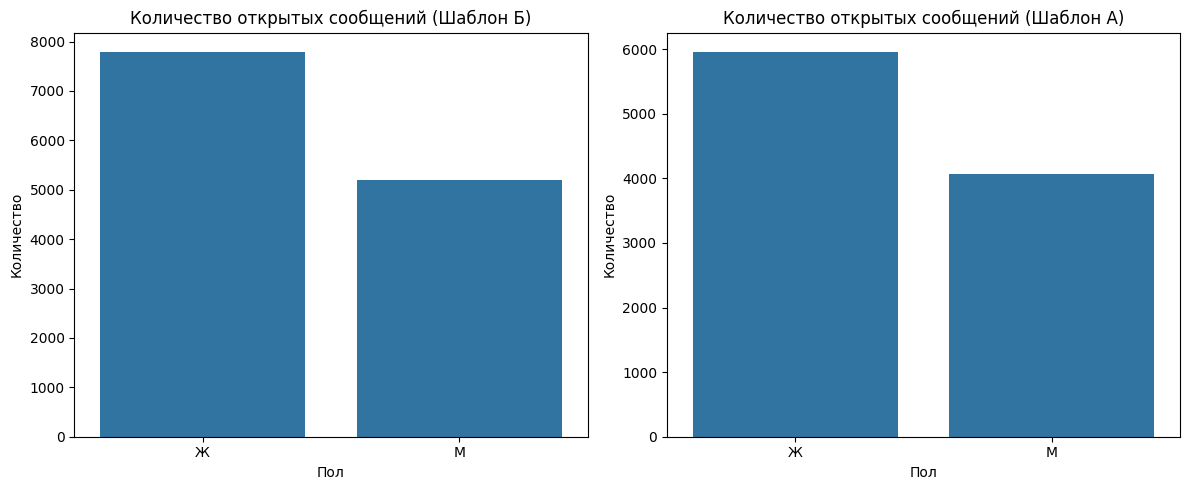

In [111]:
# Фильтрация данных для шаблона Б
data_B = df[(df["Макет"] == "Шаблон Б")]

# Фильтрация данных для шаблона А
data_A = df[(df["Макет"] == "Шаблон А")]

# Группировка по полу для шаблона Б
gender_counts_B = data_B['Пол'].value_counts()

# Группировка по полу для шаблона А
gender_counts_A = data_A['Пол'].value_counts()

# Создание подграфиков
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Визуализация для шаблона Б
sns.barplot(x=gender_counts_B.index, y=gender_counts_B.values, ax=axes[0])
axes[0].set_title('Количество открытых сообщений (Шаблон Б)')
axes[0].set_xlabel('Пол')
axes[0].set_ylabel('Количество')
axes[0].set_xticks(range(len(gender_counts_B.index)))  # Установка меток на оси X
axes[0].set_xticklabels(gender_counts_B.index, rotation=0)

# Визуализация для шаблона А
sns.barplot(x=gender_counts_A.index, y=gender_counts_A.values, ax=axes[1])
axes[1].set_title('Количество открытых сообщений (Шаблон А)')
axes[1].set_xlabel('Пол')
axes[1].set_ylabel('Количество')
axes[1].set_xticks(range(len(gender_counts_A.index)))  # Установка меток на оси X
axes[1].set_xticklabels(gender_counts_A.index, rotation=0)

# Отображение графиков
plt.tight_layout()
plt.show()

In [112]:
# Соотношение женщин и мужчин на моменто раасылки писем из группы Б

count_W_in_group_B = len(df[(df["Макет"] == "Шаблон Б") & (df['Доставлено'] == 1) & (df['Пол'] == 'Ж')])
print(f'Общее число женщин, кому доставлено письмо из группы Б:{count_W_in_group_B}')
count_M_in_group_B = len(df[(df["Макет"] == "Шаблон Б") & (df['Доставлено'] == 1) & (df['Пол'] == 'М')])
print(f'Общее число мужчин, кому доставлено письмо из группы Б:{count_M_in_group_B}')

ratio_WM_in_group_B = count_W_in_group_B / count_M_in_group_B
print(f"Соотношение женщин к мужчинам в группе Б составляет: {ratio_WM_in_group_B}")

print("###########################################################")
# Соотношение женщин и мужчин на моменто раасылки писем из группы А

count_W_in_group_A = len(df[(df["Макет"] == "Шаблон А") & (df['Доставлено'] == 1) & (df['Пол'] == 'Ж')])
print(f'Общее число женщин, кому доставлено письмо из группы А:{count_W_in_group_A}')
count_M_in_group_A = len(df[(df["Макет"] == "Шаблон А") & (df['Доставлено'] == 1) & (df['Пол'] == 'М')])
print(f'Общее число мужчин, кому доставлено письмо из группы А:{count_M_in_group_A}')

ratio_WM_in_group_A = count_W_in_group_A / count_M_in_group_A
print(f"Соотношение женщин к мужчинам в группе А составляет: {ratio_WM_in_group_A}")

Общее число женщин, кому доставлено письмо из группы Б:7792
Общее число мужчин, кому доставлено письмо из группы Б:5192
Соотношение женщин к мужчинам в группе Б составляет: 1.5007704160246533
###########################################################
Общее число женщин, кому доставлено письмо из группы А:5960
Общее число мужчин, кому доставлено письмо из группы А:4063
Соотношение женщин к мужчинам в группе А составляет: 1.466896381983756


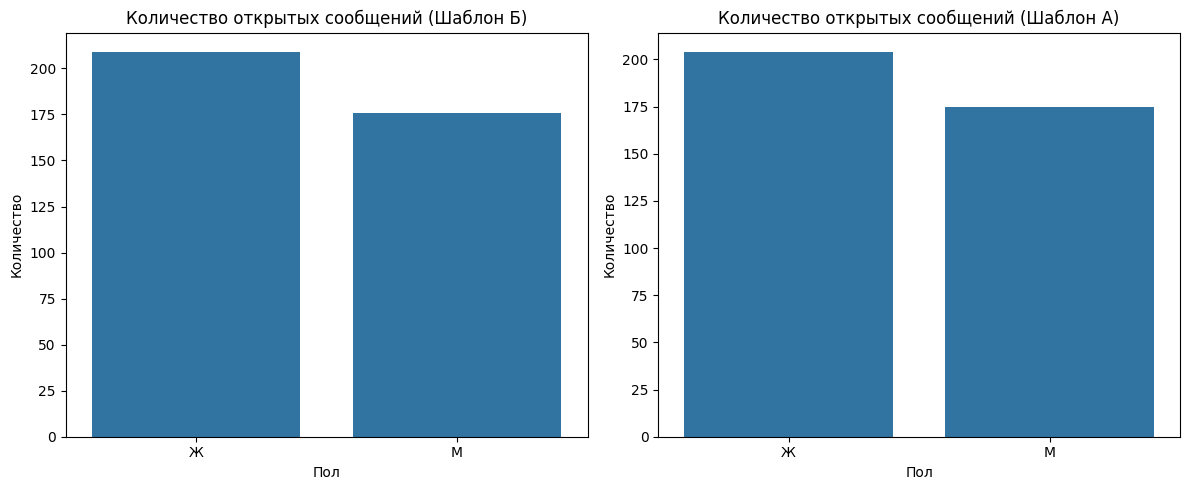

In [113]:
# Фильтрация данных для шаблона Б
filtered_data_B = df[(df["Макет"] == "Шаблон Б") &
                      (df["Доставлено"] == 1) &
                      (df["Открыто"] == 1) &
                      (df["Переход по ссылке"] == 1) &
                      (df["Отписки"] == 0)]

# Фильтрация данных для шаблона А
filtered_data_A = df[(df["Макет"] == "Шаблон А") &
                      (df["Доставлено"] == 1) &
                      (df["Открыто"] == 1) &
                      (df["Переход по ссылке"] == 1) &
                      (df["Отписки"] == 0)]

# Группировка по полу для шаблона Б
gender_counts_B = filtered_data_B['Пол'].value_counts()

# Группировка по полу для шаблона А
gender_counts_A = filtered_data_A['Пол'].value_counts()

# Создание подграфиков
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Визуализация для шаблона Б
sns.barplot(x=gender_counts_B.index, y=gender_counts_B.values, ax=axes[0])
axes[0].set_title('Количество открытых сообщений (Шаблон Б)')
axes[0].set_xlabel('Пол')
axes[0].set_ylabel('Количество')
axes[0].set_xticks(range(len(gender_counts_B.index)))  # Установка меток на оси X
axes[0].set_xticklabels(gender_counts_B.index, rotation=0)

# Визуализация для шаблона А
sns.barplot(x=gender_counts_A.index, y=gender_counts_A.values, ax=axes[1])
axes[1].set_title('Количество открытых сообщений (Шаблон А)')
axes[1].set_xlabel('Пол')
axes[1].set_ylabel('Количество')
axes[1].set_xticks(range(len(gender_counts_A.index)))  # Установка меток на оси X
axes[1].set_xticklabels(gender_counts_A.index, rotation=0)

# Отображение графиков
plt.tight_layout()
plt.show()

In [114]:
# Соотношение женщин и мужчин после рассылки, перехода и открытия ссылки из группы Б

loyal_W_in_group_B = len(df[(df["Макет"] == "Шаблон Б") & (df["Доставлено"] == 1) & (df["Открыто"] == 1) & (df["Переход по ссылке"] == 1) & (df["Отписки"] == 0) & (df['Пол'] == 'Ж')])
print(f'Число женщин, кому доставлено письмо и те, кто перешел по ссылке из группы Б:{loyal_W_in_group_B}')
loyal_M_in_group_B = len(df[(df["Макет"] == "Шаблон Б") & (df["Доставлено"] == 1) & (df["Открыто"] == 1) & (df["Переход по ссылке"] == 1) & (df["Отписки"] == 0) & (df['Пол'] == 'М')])
print(f'Число мужчин, кому доставлено письмо и те, кто перешел по ссылке из группы Б:{loyal_M_in_group_B}')

ratio_loyal_WM_in_group_B = loyal_W_in_group_B / loyal_M_in_group_B
print(f"Соотношение женщин к мужчинам после рассылки и переходу по ссылке в группе Б составляет: {ratio_loyal_WM_in_group_B}")

print("###################################################################################################")
# Соотношение женщин и мужчин после рассылки, перехода и открытия ссылки из группы А

loyal_W_in_group_A = len(df[(df["Макет"] == "Шаблон А") & (df["Доставлено"] == 1) & (df["Открыто"] == 1) & (df["Переход по ссылке"] == 1) & (df["Отписки"] == 0) & (df['Пол'] == 'Ж')])
print(f'Число женщин, кому доставлено письмо и те, кто перешел по ссылке из группы А:{loyal_W_in_group_A}')
loyal_M_in_group_A = len(df[(df["Макет"] == "Шаблон А") & (df["Доставлено"] == 1) & (df["Открыто"] == 1) & (df["Переход по ссылке"] == 1) & (df["Отписки"] == 0) & (df['Пол'] == 'М')])
print(f'Число мужчин, кому доставлено письмо и те, кто перешел по ссылке из группы А:{loyal_M_in_group_A}')

ratio_loyal_WM_in_group_A = loyal_W_in_group_A / loyal_M_in_group_A
print(f"Соотношение женщин к мужчинам после рассылки и переходу по ссылке в группе А составляет: {ratio_loyal_WM_in_group_A}")

Число женщин, кому доставлено письмо и те, кто перешел по ссылке из группы Б:209
Число мужчин, кому доставлено письмо и те, кто перешел по ссылке из группы Б:176
Соотношение женщин к мужчинам после рассылки и переходу по ссылке в группе Б составляет: 1.1875
###################################################################################################
Число женщин, кому доставлено письмо и те, кто перешел по ссылке из группы А:204
Число мужчин, кому доставлено письмо и те, кто перешел по ссылке из группы А:175
Соотношение женщин к мужчинам после рассылки и переходу по ссылке в группе А составляет: 1.1657142857142857


Из визуализации видно, что общее число женщин больше чем мужчин.

Однако, после получения письма и переходу по ссылке соотношениеженщин и мужчин становится меньше.

In [115]:
# Изменение соотношений для группы Б
change_B = ((ratio_loyal_WM_in_group_B - ratio_WM_in_group_B ) / ratio_WM_in_group_B) * 100
print(f"В группе Б после доставки, открытия письма и переходу по ссылке, женщин стало меньше на {abs(change_B)}%")

# Изменение соотношений для группы А
chfnge_A = ((ratio_loyal_WM_in_group_A - ratio_WM_in_group_A) / ratio_WM_in_group_A ) * 100
print(f"В группе А после доставки, открытия письма и переходу по ссылке, женщин стало меньше на {abs(chfnge_A)}%")

В группе Б после доставки, открытия письма и переходу по ссылке, женщин стало меньше на 20.873973305954827%
В группе А после доставки, открытия письма и переходу по ссылке, женщин стало меньше на 20.53192713326942%


Можно предположить что данная рассылка чуть лучше влияла на мужчин(возможно рассылка была в конце/начале года, перед праздниками, например такими как 8 марта или 14 февраля)

Рекомендациия:
Возможно нужно настроить шаблон письма под каждую категорию лиц - для женщин перед мужскими праздниками, для мужчин перед женскими праздниками, для семейных перед Днем семьи, Новым Годом и т.д.

Также нужно учитывать возраст клиента. Для людей младше 22-24 лет, возможно будут интересны предложения касающиеся получения образования, программ обмена с другими вузами и тд, в то время как для категории граждан от 25 до 45 - рабочий класс возможно будут инетесрны предложения о путешествиях.
